<a href="https://colab.research.google.com/github/Krisol3/Data_Analytics_Python_PowerBI/blob/main/DATATHON_WIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/DATATHON WIDS 2025/"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import scipy.stats as stats
import sklearn_pandas
import os
import tarfile
import urllib

In [ ]:
#TEST DATASETS LOAD

test_categorical = pd.read_excel('/content/drive/MyDrive/DATATHON WIDS 2025/TEST/TEST_CATEGORICAL.xlsx')
test_brainscan = pd.read_csv('/content/drive/MyDrive/DATATHON WIDS 2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
test_quantitative = pd.read_excel('/content/drive/MyDrive/DATATHON WIDS 2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx')

In [ ]:
#TRAIN DATASETS LOAD

train_categorical = pd.read_excel('/content/drive/MyDrive/DATATHON WIDS 2025/TRAIN/TRAIN_CATEGORICAL_METADATA_new.xlsx')
train_brainscan = pd.read_csv('/content/drive/MyDrive/DATATHON WIDS 2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')
train_quantitative = pd.read_excel('/content/drive/MyDrive/DATATHON WIDS 2025/TRAIN/TRAIN_QUANTITATIVE_METADATA_new.xlsx')
train_solution = pd.read_excel('/content/drive/MyDrive/DATATHON WIDS 2025/TRAIN/TRAINING_SOLUTIONS.xlsx')

# EDA FOR **TEST** DATASETS:

We start exploring the categorical dataset.

In [ ]:
test_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


In order to avoid losing unknown registers about the 2nd parent Education and Occupation information, we have decided that if an individual environment is determined by the socioeconomical situation of the parents and only has access to one, we can assume that its whole enviroment resumes as doubling the one parent results.

Duplication of Education P1 to P2 values:

In [ ]:
test_categorical['Barratt_Barratt_P2_Edu'] = test_categorical['Barratt_Barratt_P2_Edu'].fillna(test_categorical['Barratt_Barratt_P1_Edu'])

Duplication of Occupation P1 to P2 values:

In [ ]:
test_categorical['Barratt_Barratt_P2_Occ'] = test_categorical['Barratt_Barratt_P2_Occ'].fillna(test_categorical['Barratt_Barratt_P1_Occ'])

Erase nulls:

In [ ]:
test_categorical.dropna()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,21.0,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0
...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,2023,4,0.0,0.0,4,18.0,0.0,18.0,35.0
300,IUEHiLmQAqCi,2023,4,0.0,1.0,3,18.0,35.0,21.0,40.0
301,cRySmCadYFRO,2023,4,0.0,8.0,4,21.0,25.0,15.0,25.0
302,E3MvDUtJadc5,2022,4,0.0,8.0,4,21.0,0.0,21.0,45.0


After dropping the null fields in the train set, we got 296 registers inside the categorical dataset to compare with the test solution dataset of 304 values.

Next, we explore the test brainscan dataset.

In [ ]:
test_brainscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 46.2+ MB


In [ ]:
test_brainscan.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.219970,0.610695,0.419458,0.395230,0.480795,0.530394,0.496573,0.287560,0.413862,0.244862,...,0.049241,-0.055612,-0.015886,0.022734,0.558894,0.353789,0.380367,0.503837,0.487597,0.557431
std,0.249959,0.163408,0.248612,0.244413,0.256404,0.167916,0.178327,0.201606,0.196153,0.218831,...,0.199660,0.225587,0.215424,0.206935,0.156629,0.203452,0.195547,0.170680,0.183347,0.173604
min,-0.713362,-0.118109,-0.376194,-0.379673,-0.379396,-0.022415,-0.113225,-0.516528,-0.195773,-0.555761,...,-0.363454,-0.501310,-0.570880,-0.479486,0.000000,-0.201091,-0.213887,-0.040523,-0.199617,-0.168106
25%,0.059497,0.511165,0.243170,0.267692,0.344056,0.424307,0.379608,0.159488,0.287149,0.089417,...,-0.093097,-0.227949,-0.164278,-0.128828,0.479489,0.235322,0.264928,0.401851,0.377687,0.456239
50%,0.219107,0.634942,0.453220,0.442026,0.539100,0.539635,0.524052,0.322734,0.426979,0.268674,...,0.037098,-0.077162,-0.014110,0.006236,0.577125,0.374062,0.404230,0.539822,0.502269,0.581648
75%,0.396008,0.727476,0.605324,0.561536,0.671823,0.652488,0.624549,0.429456,0.571971,0.411791,...,0.179494,0.100244,0.126558,0.154479,0.662010,0.508747,0.528825,0.627340,0.616772,0.682909
max,0.778206,0.904572,0.875906,0.915949,0.914515,0.920882,0.921036,0.887702,0.907231,0.877371,...,0.737060,0.681016,0.781968,0.809705,0.874170,0.780386,0.765132,0.859924,0.820123,0.872319


In [ ]:
test_brainscan.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


The complexity of the brain scan dataset relies on the massive number of columns as the dataset contains brain coordenates and we need to handle a high amount of information. To simplify the data handling we reduce the variables contained in this dataset with the PCA method included in the SKLearn library.

Once we reduced the amount of variables related to the brain scan we proceed with merging the brain scan dataset with the results of the test so we can correlated the brain scan results with our prediction.

Número de componentes que explican al menos el 95% de la varianza: 257


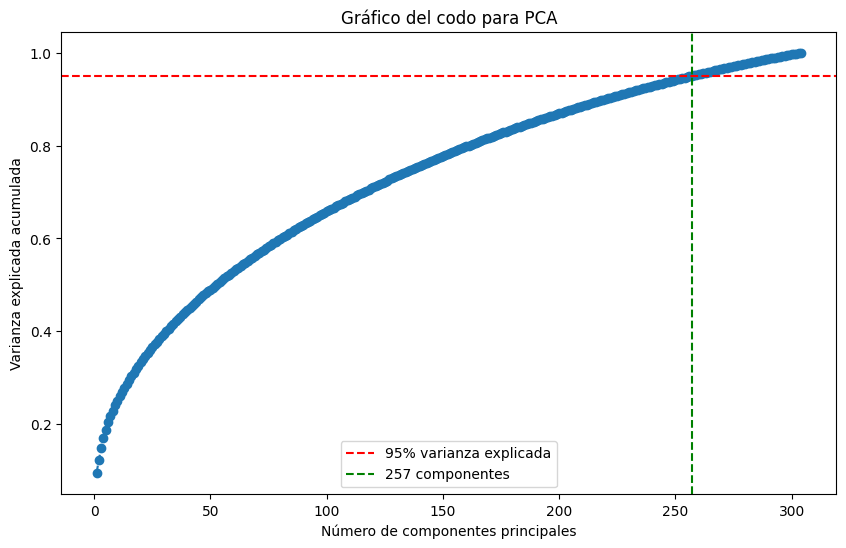


DataFrame completo para el modelo (incluyendo 'participant_id'):
         PC1        PC2        PC3        PC4        PC5        PC6  \
0  -1.562984   2.349945  17.974107  12.766769   8.169324  -9.672108   
1 -28.623815 -12.944786  10.422301  18.154070  13.461957  16.565212   
2  -5.158916   3.443302  -5.079904 -28.354436 -14.220847   4.902515   
3  -7.410461 -11.299204  12.108976  -6.071760   3.220456   5.241744   
4  14.920496  -3.810258   8.792984   0.093734 -13.140130   5.536761   

         PC7        PC8       PC9       PC10  ...     PC249     PC250  \
0  10.215140  15.303333  6.438033   0.768463  ... -1.159142  0.476914   
1   4.276666   6.608498 -2.724528   8.010349  ...  2.546204 -1.381019   
2  -9.921163 -10.916752 -9.422743  10.499534  ...  6.460293  6.719168   
3 -10.732637  -0.287094  3.010876   9.020822  ...  6.415094  0.380986   
4   1.705721  -4.084991 -6.175663  -0.024053  ... -1.557212  0.467490   

      PC251      PC252     PC253     PC254      PC255     PC256     

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

test_brainscan_filter = test_brainscan.drop(columns='participant_id')

# Escala los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_brainscan_filter)

# Calcula PCA para todos los componentes posibles
pca = PCA()
pca.fit(scaled_data)

# Calcula la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Determina el número de componentes que explican al menos el 95% de la varianza
n_components_95 = next(i for i, total in enumerate(cumulative_variance) if total >= 0.95) + 1

print(f'Número de componentes que explican al menos el 95% de la varianza: {n_components_95}')

# Gráfico del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(0.95, color='red', linestyle='--', label='95% varianza explicada')
plt.axvline(n_components_95, color='green', linestyle='--', label=f'{n_components_95} componentes')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Gráfico del codo para PCA')
plt.legend()
plt.show()

# Realiza PCA con el número óptimo de componentes
pca_final = PCA(n_components=n_components_95)
principal_components = pca_final.fit_transform(scaled_data)

# Crea un DataFrame con las componentes principales
test_brainscan_reduced = pd.DataFrame(
    data=principal_components,
    columns=[f'PC{i+1}' for i in range(n_components_95)]
)

# Añade la columna 'participant_id' original
test_brainscan_reduced['participant_id'] = test_brainscan['participant_id'].values

# componentes principales para el modelo:
test_model_features_df = test_brainscan_reduced[[f'PC{i+1}' for i in range(n_components_95)]]
test_full_model_df = test_brainscan_reduced.copy()

print("\nDataFrame completo para el modelo (incluyendo 'participant_id'):")
print(test_full_model_df.head())



Matriz de Correlación de los Componentes Principales:
                PC1           PC2           PC3           PC4           PC5  \
PC1    1.000000e+00 -1.617120e-16 -8.101796e-17  2.807045e-16  1.835632e-16   
PC2   -1.617120e-16  1.000000e+00  8.648475e-16  4.419112e-16 -7.674964e-17   
PC3   -8.101796e-17  8.648475e-16  1.000000e+00  5.297311e-17  4.239215e-16   
PC4    2.807045e-16  4.419112e-16  5.297311e-17  1.000000e+00 -5.321426e-16   
PC5    1.835632e-16 -7.674964e-17  4.239215e-16 -5.321426e-16  1.000000e+00   
...             ...           ...           ...           ...           ...   
PC253 -2.044602e-17  1.208075e-16  1.405940e-16  1.073738e-17  1.777773e-18   
PC254  3.278533e-18 -1.519914e-17 -7.432944e-18  3.499634e-17  6.061070e-17   
PC255 -1.576557e-17 -2.479932e-19 -9.956386e-17  1.314469e-16  1.661835e-16   
PC256  4.055488e-17 -3.222616e-17 -5.880538e-17 -4.418325e-17 -2.226835e-17   
PC257  1.166966e-17  1.292562e-17  3.797276e-17  3.202893e-17  1.895946e-17 

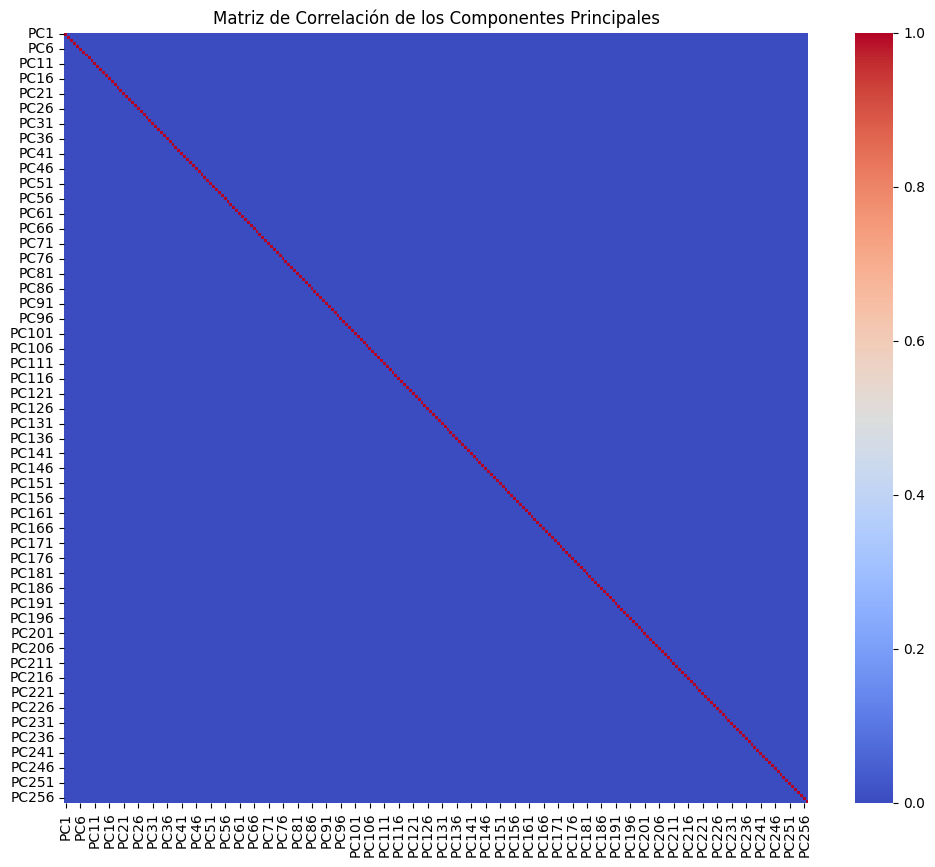

In [ ]:
# Matriz de correlación entre los componentes principales
correlation_matrix = test_full_model_df[[f'PC{i+1}' for i in range(257)]].corr()

print("\nMatriz de Correlación de los Componentes Principales:")
print(correlation_matrix)

# Matriz de correlación como un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de los Componentes Principales')
plt.show()

In [ ]:
test_full_model_df = test_full_model_df.merge(test_categorical, on='participant_id', how='left')

In [ ]:
test_full_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 267 entries, PC1 to Barratt_Barratt_P2_Occ
dtypes: float64(263), int64(3), object(1)
memory usage: 634.3+ KB


In [ ]:
test_full_model_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object', length=267)

# EDA FOR **TRAIN** DATASETS

As we did with the test datahandling procedure, we start with the categorical dataset.

In [ ]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


We follow the same procedure of duplicating the values missing in the P2_Edu and P2_Occ columns.

In [ ]:
train_categorical['Barratt_Barratt_P2_Edu'] = train_categorical['Barratt_Barratt_P2_Edu'].fillna(train_categorical['Barratt_Barratt_P1_Edu'])

In [ ]:
train_categorical['Barratt_Barratt_P2_Occ'] = train_categorical['Barratt_Barratt_P2_Occ'].fillna(train_categorical['Barratt_Barratt_P1_Occ'])

In [ ]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1200 non-null   float64
 9   Barratt_Barratt_P2_Occ            1188 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


After explore the dataset with last changes we spot 2 registers missing in the P1 but included in P2 so we repeat the process inverse.

In [ ]:
train_categorical['Barratt_Barratt_P1_Edu'] = train_categorical['Barratt_Barratt_P1_Edu'].fillna(train_categorical['Barratt_Barratt_P2_Edu'])

In [ ]:
train_categorical['Barratt_Barratt_P1_Occ'] = train_categorical['Barratt_Barratt_P1_Occ'].fillna(train_categorical['Barratt_Barratt_P2_Occ'])

In [ ]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1200 non-null   float64
 7   Barratt_Barratt_P1_Occ            1188 non-null   float64
 8   Barratt_Barratt_P2_Edu            1200 non-null   float64
 9   Barratt_Barratt_P2_Occ            1188 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


Secondly we work on the brainscan dataset.

In [ ]:
train_brainscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [ ]:
train_brainscan.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.185265,0.583053,0.439351,0.450398,0.584654,0.554164,0.508957,0.282565,0.426095,0.254628,...,0.044413,-0.079307,-0.037423,0.009393,0.557159,0.376624,0.370711,0.500415,0.476418,0.543181
std,0.238481,0.172632,0.235019,0.212111,0.195918,0.157533,0.179127,0.189683,0.202979,0.208395,...,0.191253,0.204061,0.205052,0.198820,0.150605,0.197995,0.191249,0.177047,0.177732,0.170237
min,-0.657053,-0.224815,-0.517318,-0.440235,-0.486239,-0.059139,-0.181009,-0.341516,-0.353362,-0.578757,...,-0.547155,-0.620350,-0.584162,-0.605647,-0.052284,-0.359869,-0.553067,-0.302408,-0.307228,-0.224057
25%,0.028235,0.495514,0.286137,0.314428,0.486735,0.462448,0.406548,0.152607,0.319183,0.124448,...,-0.087566,-0.220508,-0.187871,-0.124404,0.469147,0.262601,0.242569,0.389078,0.367971,0.442283
50%,0.192886,0.606585,0.469826,0.479330,0.623346,0.577187,0.534237,0.290552,0.452538,0.268802,...,0.043204,-0.093695,-0.044155,0.004375,0.573840,0.391739,0.388528,0.524508,0.496103,0.566455
75%,0.358902,0.710758,0.626871,0.604438,0.726116,0.670072,0.636448,0.423821,0.570470,0.402742,...,0.177608,0.049707,0.104526,0.146865,0.666128,0.521904,0.505970,0.630443,0.600065,0.667402
max,0.824448,0.907209,0.884576,0.876987,0.893974,0.882400,0.892983,0.803253,0.854104,0.828335,...,0.670512,0.596618,0.630932,0.666169,0.889148,0.866371,0.828784,0.914021,0.898459,0.903364


In [ ]:
train_brainscan.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


Número de componentes que explican al menos el 95% de la varianza: 909


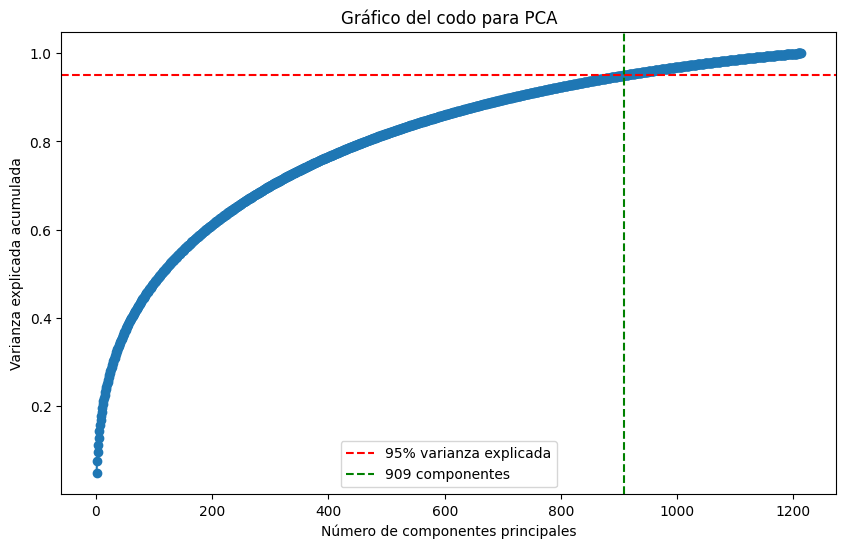


DataFrame completo para el modelo (incluyendo 'participant_id'):
         PC1        PC2        PC3        PC4        PC5        PC6  \
0  35.753597   0.090543 -20.350098  19.088315 -30.805000   2.306746   
1  28.459455 -18.887916  10.232790   1.115161  -7.235638 -14.893705   
2   0.798687   4.718468  10.989505 -17.687384  10.643912  31.792714   
3 -45.767171 -11.453186   4.095472  12.695696 -20.976371  22.331782   
4   3.746646  -8.847485  10.058838  -2.305610  -3.341812  14.484016   

         PC7        PC8        PC9       PC10  ...     PC901     PC902  \
0  -0.012355 -16.080110  -6.713655   7.132238  ... -1.497038 -1.373348   
1  -5.991655  -3.274425 -18.623446 -12.154646  ... -3.310777  0.161411   
2   9.804087  16.585635 -15.010728  -8.778202  ... -3.542214  2.147602   
3  -4.630708  -4.709863   0.145218  10.252135  ... -2.139078 -2.043515   
4 -28.106098   5.519340  -6.920033   4.655665  ...  1.419341  1.647383   

      PC903     PC904     PC905     PC906     PC907     PC908 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

train_brainscan_filter = train_brainscan.drop(columns='participant_id')

# Escala los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_brainscan_filter)

# Calcula PCA para todos los componentes posibles
pca = PCA()
pca.fit(scaled_data)

# Calcula la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Determina el número de componentes que explican al menos el 95% de la varianza
n_components_95 = next(i for i, total in enumerate(cumulative_variance) if total >= 0.95) + 1

print(f'Número de componentes que explican al menos el 95% de la varianza: {n_components_95}')

# Gráfico del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(0.95, color='red', linestyle='--', label='95% varianza explicada')
plt.axvline(n_components_95, color='green', linestyle='--', label=f'{n_components_95} componentes')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Gráfico del codo para PCA')
plt.legend()
plt.show()

# Realiza PCA con el número óptimo de componentes
pca_final = PCA(n_components=n_components_95)
principal_components = pca_final.fit_transform(scaled_data)

# Crea un DataFrame con las componentes principales
train_brainscan_reduced = pd.DataFrame(
    data=principal_components,
    columns=[f'PC{i+1}' for i in range(n_components_95)]
)

# Añade la columna 'participant_id' original
train_brainscan_reduced['participant_id'] = train_brainscan['participant_id'].values

# componentes principales para el modelo:
train_model_features_df = train_brainscan_reduced[[f'PC{i+1}' for i in range(n_components_95)]]
train_full_model_df = train_brainscan_reduced.copy()

print("\nDataFrame completo para el modelo (incluyendo 'participant_id'):")
print(train_full_model_df.head())


Matriz de Correlación de los Componentes Principales:
                PC1           PC2           PC3           PC4           PC5  \
PC1    1.000000e+00  4.280661e-17 -4.838000e-17  9.486622e-17 -4.307338e-17   
PC2    4.280661e-17  1.000000e+00  5.667740e-16  3.079502e-17 -6.356133e-19   
PC3   -4.838000e-17  5.667740e-16  1.000000e+00  3.160178e-17 -1.728933e-18   
PC4    9.486622e-17  3.079502e-17  3.160178e-17  1.000000e+00 -3.319519e-17   
PC5   -4.307338e-17 -6.356133e-19 -1.728933e-18 -3.319519e-17  1.000000e+00   
...             ...           ...           ...           ...           ...   
PC905  1.387352e-17  2.058290e-17  3.595204e-19 -3.710080e-17 -1.228840e-17   
PC906 -5.162954e-18 -4.485110e-18  5.624169e-18 -3.910323e-18 -2.053358e-17   
PC907 -3.398820e-17 -1.667859e-17  2.251532e-19  4.288824e-18 -1.738249e-17   
PC908  2.063845e-19 -2.522782e-17  2.157201e-17  7.599307e-18  1.764085e-17   
PC909  5.417743e-17 -1.694321e-18 -1.043587e-17 -1.879310e-17 -2.997355e-17 

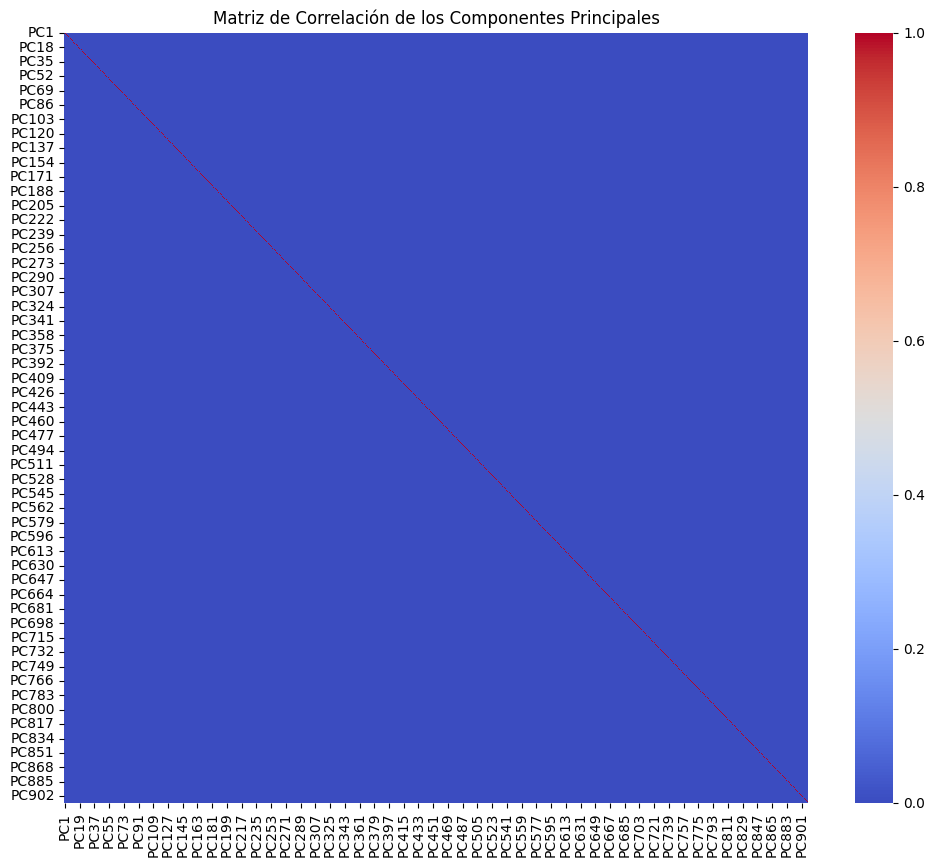

In [ ]:
# Matriz de correlación entre los componentes principales
train_correlation_matrix = train_full_model_df[[f'PC{i+1}' for i in range(909)]].corr()

print("\nMatriz de Correlación de los Componentes Principales:")
print(train_correlation_matrix)

# Matriz de correlación como un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de los Componentes Principales')
plt.show()

In [ ]:
train_full_model_df = train_full_model_df.merge(train_categorical, on='participant_id', how='left')

In [ ]:
train_full_model_df = train_full_model_df.merge(train_solution, on='participant_id', how='left')

In [ ]:
train_full_model_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity',
       'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location',
       'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ',
       'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'ADHD_Outcome',
       'Sex_F'],
      dtype='object', length=921)

In [ ]:
train_full_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 921 entries, PC1 to Sex_F
dtypes: float64(916), int64(4), object(1)
memory usage: 8.5+ MB


# MODEL CREATION

We have chosen a multioutput Classifier model as we need to predict both the gender and the possibility of developing TDAH of the patient. For creating the model we use some of the functions and methods included in the SK Learn library.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

X_train = train_full_model_df[[f'PC{i+1}' for i in range(n_components_95)]]
Y_train = train_full_model_df[['ADHD_Outcome', 'Sex_F']]

X_test = test_full_model_df[[f'PC{i+1}' for i in range(909)]]
Y_test = test_full_model_df[['ADHD_Outcome', 'Sex_F']]

# Crear el modelo
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Entrenar el modelo
model.fit(X_train, Y_train)

# Predicción y evaluación
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

KeyError: "['PC258', 'PC259', 'PC260', 'PC261', 'PC262', 'PC263', 'PC264', 'PC265', 'PC266', 'PC267', 'PC268', 'PC269', 'PC270', 'PC271', 'PC272', 'PC273', 'PC274', 'PC275', 'PC276', 'PC277', 'PC278', 'PC279', 'PC280', 'PC281', 'PC282', 'PC283', 'PC284', 'PC285', 'PC286', 'PC287', 'PC288', 'PC289', 'PC290', 'PC291', 'PC292', 'PC293', 'PC294', 'PC295', 'PC296', 'PC297', 'PC298', 'PC299', 'PC300', 'PC301', 'PC302', 'PC303', 'PC304', 'PC305', 'PC306', 'PC307', 'PC308', 'PC309', 'PC310', 'PC311', 'PC312', 'PC313', 'PC314', 'PC315', 'PC316', 'PC317', 'PC318', 'PC319', 'PC320', 'PC321', 'PC322', 'PC323', 'PC324', 'PC325', 'PC326', 'PC327', 'PC328', 'PC329', 'PC330', 'PC331', 'PC332', 'PC333', 'PC334', 'PC335', 'PC336', 'PC337', 'PC338', 'PC339', 'PC340', 'PC341', 'PC342', 'PC343', 'PC344', 'PC345', 'PC346', 'PC347', 'PC348', 'PC349', 'PC350', 'PC351', 'PC352', 'PC353', 'PC354', 'PC355', 'PC356', 'PC357', 'PC358', 'PC359', 'PC360', 'PC361', 'PC362', 'PC363', 'PC364', 'PC365', 'PC366', 'PC367', 'PC368', 'PC369', 'PC370', 'PC371', 'PC372', 'PC373', 'PC374', 'PC375', 'PC376', 'PC377', 'PC378', 'PC379', 'PC380', 'PC381', 'PC382', 'PC383', 'PC384', 'PC385', 'PC386', 'PC387', 'PC388', 'PC389', 'PC390', 'PC391', 'PC392', 'PC393', 'PC394', 'PC395', 'PC396', 'PC397', 'PC398', 'PC399', 'PC400', 'PC401', 'PC402', 'PC403', 'PC404', 'PC405', 'PC406', 'PC407', 'PC408', 'PC409', 'PC410', 'PC411', 'PC412', 'PC413', 'PC414', 'PC415', 'PC416', 'PC417', 'PC418', 'PC419', 'PC420', 'PC421', 'PC422', 'PC423', 'PC424', 'PC425', 'PC426', 'PC427', 'PC428', 'PC429', 'PC430', 'PC431', 'PC432', 'PC433', 'PC434', 'PC435', 'PC436', 'PC437', 'PC438', 'PC439', 'PC440', 'PC441', 'PC442', 'PC443', 'PC444', 'PC445', 'PC446', 'PC447', 'PC448', 'PC449', 'PC450', 'PC451', 'PC452', 'PC453', 'PC454', 'PC455', 'PC456', 'PC457', 'PC458', 'PC459', 'PC460', 'PC461', 'PC462', 'PC463', 'PC464', 'PC465', 'PC466', 'PC467', 'PC468', 'PC469', 'PC470', 'PC471', 'PC472', 'PC473', 'PC474', 'PC475', 'PC476', 'PC477', 'PC478', 'PC479', 'PC480', 'PC481', 'PC482', 'PC483', 'PC484', 'PC485', 'PC486', 'PC487', 'PC488', 'PC489', 'PC490', 'PC491', 'PC492', 'PC493', 'PC494', 'PC495', 'PC496', 'PC497', 'PC498', 'PC499', 'PC500', 'PC501', 'PC502', 'PC503', 'PC504', 'PC505', 'PC506', 'PC507', 'PC508', 'PC509', 'PC510', 'PC511', 'PC512', 'PC513', 'PC514', 'PC515', 'PC516', 'PC517', 'PC518', 'PC519', 'PC520', 'PC521', 'PC522', 'PC523', 'PC524', 'PC525', 'PC526', 'PC527', 'PC528', 'PC529', 'PC530', 'PC531', 'PC532', 'PC533', 'PC534', 'PC535', 'PC536', 'PC537', 'PC538', 'PC539', 'PC540', 'PC541', 'PC542', 'PC543', 'PC544', 'PC545', 'PC546', 'PC547', 'PC548', 'PC549', 'PC550', 'PC551', 'PC552', 'PC553', 'PC554', 'PC555', 'PC556', 'PC557', 'PC558', 'PC559', 'PC560', 'PC561', 'PC562', 'PC563', 'PC564', 'PC565', 'PC566', 'PC567', 'PC568', 'PC569', 'PC570', 'PC571', 'PC572', 'PC573', 'PC574', 'PC575', 'PC576', 'PC577', 'PC578', 'PC579', 'PC580', 'PC581', 'PC582', 'PC583', 'PC584', 'PC585', 'PC586', 'PC587', 'PC588', 'PC589', 'PC590', 'PC591', 'PC592', 'PC593', 'PC594', 'PC595', 'PC596', 'PC597', 'PC598', 'PC599', 'PC600', 'PC601', 'PC602', 'PC603', 'PC604', 'PC605', 'PC606', 'PC607', 'PC608', 'PC609', 'PC610', 'PC611', 'PC612', 'PC613', 'PC614', 'PC615', 'PC616', 'PC617', 'PC618', 'PC619', 'PC620', 'PC621', 'PC622', 'PC623', 'PC624', 'PC625', 'PC626', 'PC627', 'PC628', 'PC629', 'PC630', 'PC631', 'PC632', 'PC633', 'PC634', 'PC635', 'PC636', 'PC637', 'PC638', 'PC639', 'PC640', 'PC641', 'PC642', 'PC643', 'PC644', 'PC645', 'PC646', 'PC647', 'PC648', 'PC649', 'PC650', 'PC651', 'PC652', 'PC653', 'PC654', 'PC655', 'PC656', 'PC657', 'PC658', 'PC659', 'PC660', 'PC661', 'PC662', 'PC663', 'PC664', 'PC665', 'PC666', 'PC667', 'PC668', 'PC669', 'PC670', 'PC671', 'PC672', 'PC673', 'PC674', 'PC675', 'PC676', 'PC677', 'PC678', 'PC679', 'PC680', 'PC681', 'PC682', 'PC683', 'PC684', 'PC685', 'PC686', 'PC687', 'PC688', 'PC689', 'PC690', 'PC691', 'PC692', 'PC693', 'PC694', 'PC695', 'PC696', 'PC697', 'PC698', 'PC699', 'PC700', 'PC701', 'PC702', 'PC703', 'PC704', 'PC705', 'PC706', 'PC707', 'PC708', 'PC709', 'PC710', 'PC711', 'PC712', 'PC713', 'PC714', 'PC715', 'PC716', 'PC717', 'PC718', 'PC719', 'PC720', 'PC721', 'PC722', 'PC723', 'PC724', 'PC725', 'PC726', 'PC727', 'PC728', 'PC729', 'PC730', 'PC731', 'PC732', 'PC733', 'PC734', 'PC735', 'PC736', 'PC737', 'PC738', 'PC739', 'PC740', 'PC741', 'PC742', 'PC743', 'PC744', 'PC745', 'PC746', 'PC747', 'PC748', 'PC749', 'PC750', 'PC751', 'PC752', 'PC753', 'PC754', 'PC755', 'PC756', 'PC757', 'PC758', 'PC759', 'PC760', 'PC761', 'PC762', 'PC763', 'PC764', 'PC765', 'PC766', 'PC767', 'PC768', 'PC769', 'PC770', 'PC771', 'PC772', 'PC773', 'PC774', 'PC775', 'PC776', 'PC777', 'PC778', 'PC779', 'PC780', 'PC781', 'PC782', 'PC783', 'PC784', 'PC785', 'PC786', 'PC787', 'PC788', 'PC789', 'PC790', 'PC791', 'PC792', 'PC793', 'PC794', 'PC795', 'PC796', 'PC797', 'PC798', 'PC799', 'PC800', 'PC801', 'PC802', 'PC803', 'PC804', 'PC805', 'PC806', 'PC807', 'PC808', 'PC809', 'PC810', 'PC811', 'PC812', 'PC813', 'PC814', 'PC815', 'PC816', 'PC817', 'PC818', 'PC819', 'PC820', 'PC821', 'PC822', 'PC823', 'PC824', 'PC825', 'PC826', 'PC827', 'PC828', 'PC829', 'PC830', 'PC831', 'PC832', 'PC833', 'PC834', 'PC835', 'PC836', 'PC837', 'PC838', 'PC839', 'PC840', 'PC841', 'PC842', 'PC843', 'PC844', 'PC845', 'PC846', 'PC847', 'PC848', 'PC849', 'PC850', 'PC851', 'PC852', 'PC853', 'PC854', 'PC855', 'PC856', 'PC857', 'PC858', 'PC859', 'PC860', 'PC861', 'PC862', 'PC863', 'PC864', 'PC865', 'PC866', 'PC867', 'PC868', 'PC869', 'PC870', 'PC871', 'PC872', 'PC873', 'PC874', 'PC875', 'PC876', 'PC877', 'PC878', 'PC879', 'PC880', 'PC881', 'PC882', 'PC883', 'PC884', 'PC885', 'PC886', 'PC887', 'PC888', 'PC889', 'PC890', 'PC891', 'PC892', 'PC893', 'PC894', 'PC895', 'PC896', 'PC897', 'PC898', 'PC899', 'PC900', 'PC901', 'PC902', 'PC903', 'PC904', 'PC905', 'PC906', 'PC907', 'PC908', 'PC909'] not in index"

In [ ]:
# Check the shapes of your data
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (1213, 20)
Shape of Y_train: (1213, 2)
Shape of X_test: (304, 20)


NameError: name 'Y_test' is not defined